In [0]:
#import libraries
import pyspark
import numpy as np
import seaborn as sns
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier

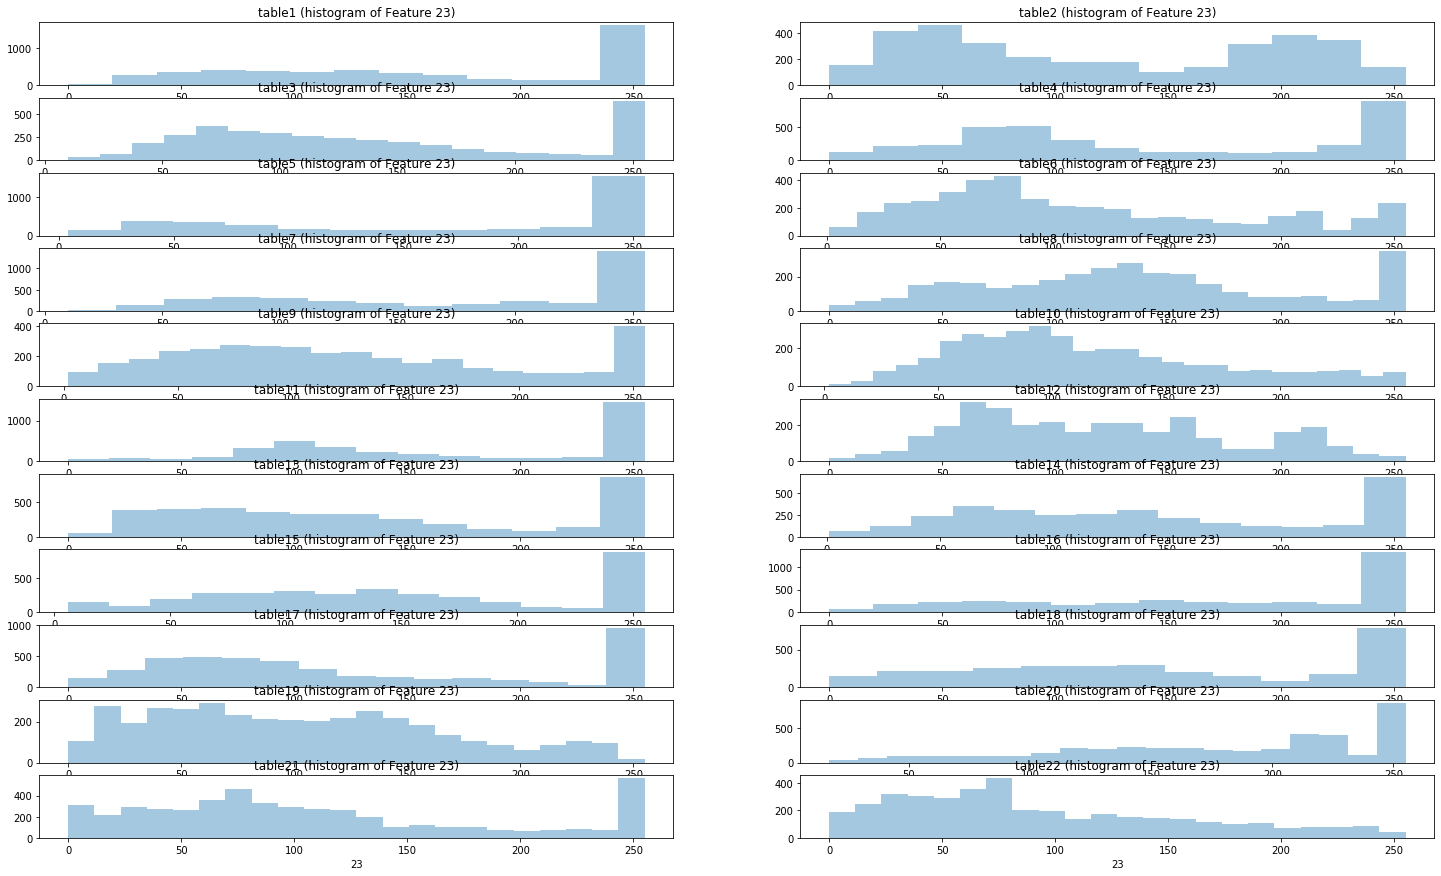

In [0]:
#list of all available tables of 3 class classifiers
tables = ['table1', 'table2', 'table3', 'table4', 'table5', 'table6', 'table7', 'table8', 'table9', 'table10', 'table11', 'table12', 'table13', 'table14', 'table15', 'table16', 'table17', 'table18', 'table19', 'table20', 'table21', 'table22']

#dimensions for subplot
dims = (11, 2)
 
#obtain axes for sublotplot
f, axes = plt.subplots(dims[0], dims[1], figsize=(25, 15))

#set initial subplot position to be top left
axis_i, axis_j = 0, 0

#loop to traverse through all the tables
for table in tables:
  
  #create query using the table name
  query = "SELECT * FROM " + table
  
  #obtain table from sql database
  df = sqlContext.sql(query)

  #convert table to pandas dataframe
  input_data = df.select("*").toPandas()
  
  #plot histogram
  sns.distplot(input_data['23'], kde = False, ax = axes[axis_i, axis_j]).set_title(table + " (histogram of Feature 23)")
  
  #change x pos variable
  axis_j += 1
  
  #change y position variable if needed
  if axis_j == dims[1]:
    axis_i += 1
    axis_j = 0

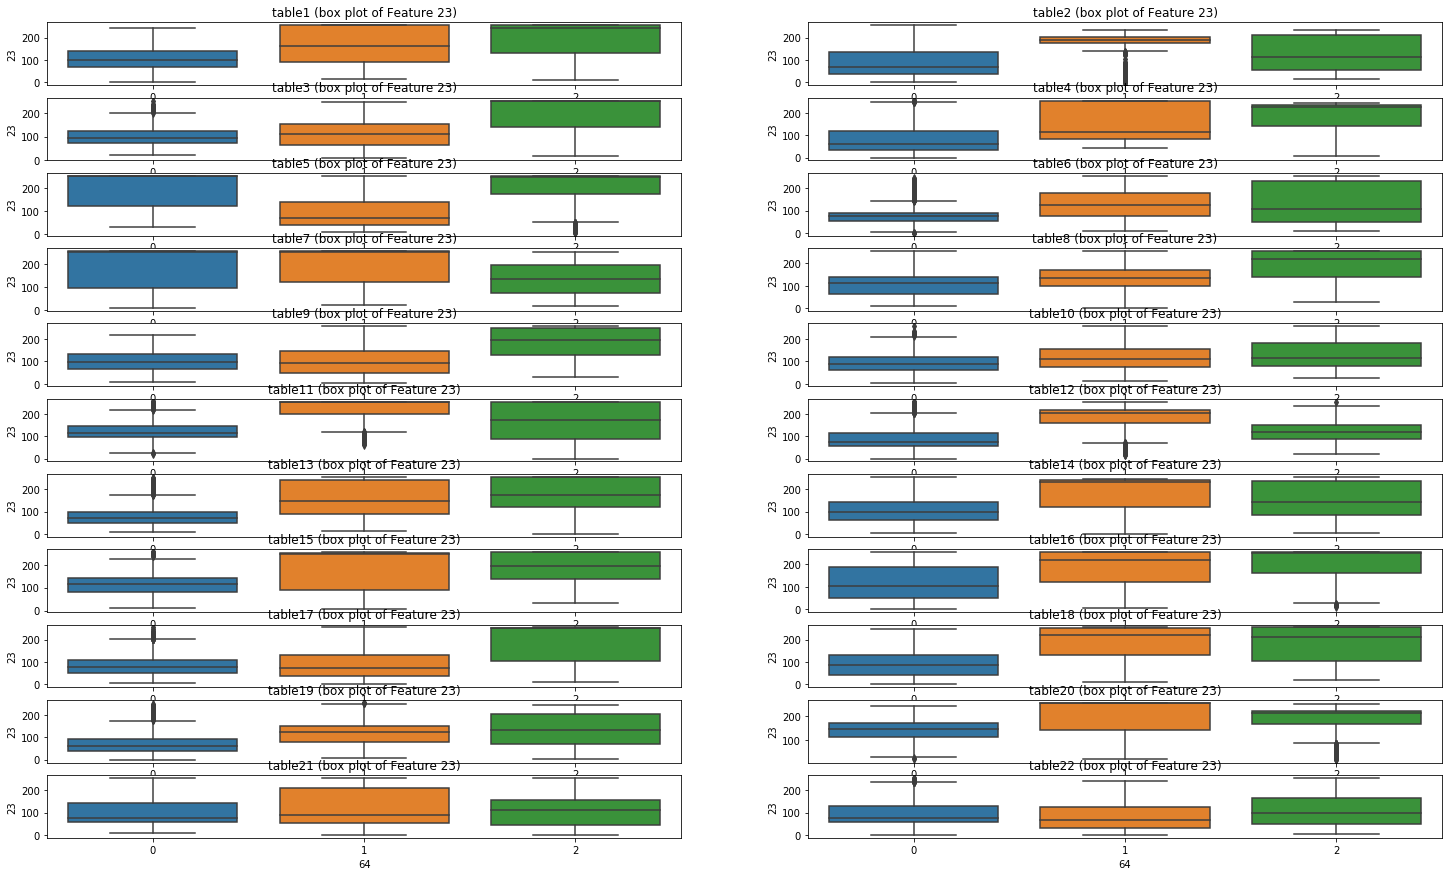

In [0]:
#list of all available tables
tables = ['table1', 'table2', 'table3', 'table4', 'table5', 'table6', 'table7', 'table8', 'table9', 'table10', 'table11', 'table12', 'table13', 'table14', 'table15', 'table16', 'table17', 'table18', 'table19', 'table20', 'table21', 'table22']

#dimensions for subplot
dims = (11, 2)
 
#obtain axes for sublotplot
f, axes = plt.subplots(dims[0], dims[1], figsize=(25, 15))

#set initial subplot position to be top left
axis_i, axis_j = 0, 0

#loop to traverse through all the tables
for table in tables:
  
  #create query using the table name
  query = "SELECT * FROM " + table
  
  #obtain table from sql database
  df = sqlContext.sql(query)

  #convert table to pandas dataframe
  input_data = df.select("*").toPandas()
  
  #obtain the label column
  y = input_data['64']

  #drop the label column
  input_data.drop('64', axis = 1, inplace = True)

  #save the new dataframe as x
  x  = input_data
  
  #plot boxplot
  sns.boxplot(x = y, y = x['23'], ax=axes[axis_i, axis_j]).set_title(table + " (box plot of Feature 23)")
  
  #change x pos variable
  axis_j += 1
  
  #change y position variable if needed
  if axis_j == dims[1]:
    axis_i += 1
    axis_j = 0

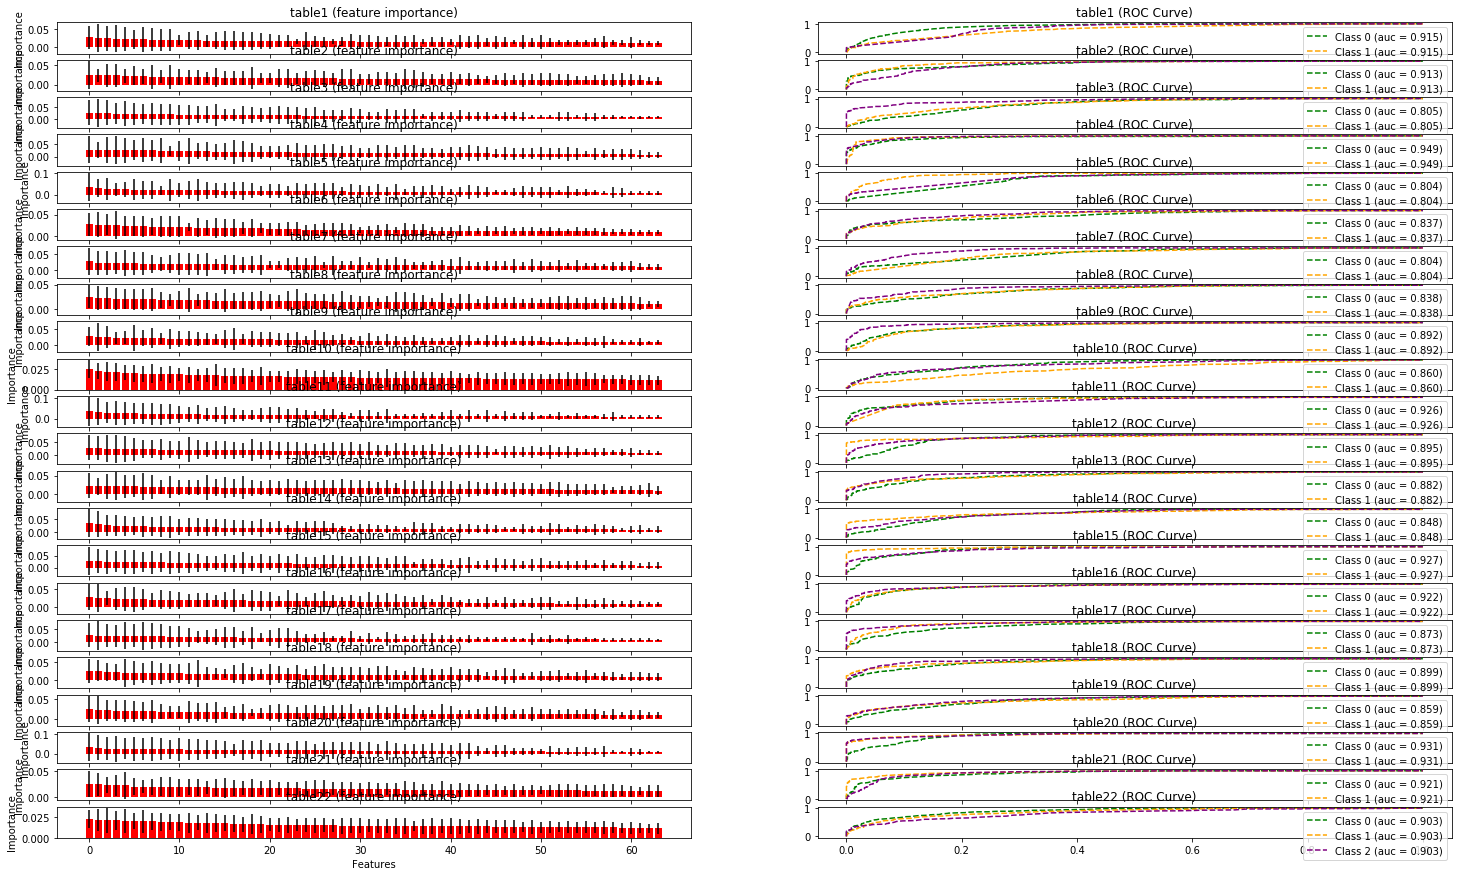

In [0]:
#list of all available tables
tables = ['table1', 'table2', 'table3', 'table4', 'table5', 'table6', 'table7', 'table8', 'table9', 'table10', 'table11', 'table12', 'table13', 'table14', 'table15', 'table16', 'table17', 'table18', 'table19', 'table20', 'table21', 'table22']

#dimensions for subplot
dims = (22, 2)
 
#obtain axes for sublotplot
f, axes = plt.subplots(dims[0], dims[1], figsize=(25, 15))

#set initial subplot position to be top left
axis_i, axis_j = 0, 0

#list of measures
measures = []

#list of matricies
matricies = []

#loop to traverse through all the tables
for table in tables:
  
  #create query using the table name
  query = "SELECT * FROM " + table
  
  #obtain table from sql database
  df = sqlContext.sql(query)

  #convert table to pandas dataframe
  input_data = df.select("*").toPandas()
  
  #obtain the label column
  labels = input_data['64']

  #drop the label column
  input_data.drop('64', axis = 1, inplace = True)

  #save the new dataframe as vectors
  vectors  = input_data
  
  #convert the feature vectors into a numpy array
  x = np.array(vectors)

  #convert the label column into a numpy array
  y = np.array(labels)

  #obtain the number of rows and columns of the feature vectors
  rows, columns = vectors.shape

  #obtain the number that divides the data into training and testing 
  divider = round(rows * 0.8)

  #obtain the training data
  x_train = x[0:divider - 1, :]
  y_train = y[0:divider - 1]

  #obtain testing data
  x_test = x[divider:rows, :]
  y_test = y[divider:rows]
  
  #create random forest classifier
  classifier  = RandomForestClassifier(random_state = 0, n_estimators = 200, oob_score = True, n_jobs = -1)
  
  #train the model with the training data
  model = classifier.fit(x_train, y_train)

  #predict the test vectors
  y_pred = model.predict(x_test)

  #create a confusion matrix
  confusionMatrix = confusion_matrix(y_test, y_pred)
  
  #obtain the true negative, false positive, false negative, and true positive 
  TN = confusionMatrix[1,1]
  FP = confusionMatrix[1,0]
  FN = confusionMatrix[0,1]
  TP = confusionMatrix[0,0]
  
  #append confusion matrix to list
  matricies.append([TN, FP, FN, TP])

  #compute precision quality measure
  precision = 1 / (1 + (FP / TP))

  #compute the sensitivity quality measure
  sensitivity = 1 / (1 + (FN / TP))
  
  #append measures to list
  measures.append([precision, sensitivity])
  
  #obtain feature importance
  importance = model.feature_importances_
  
  #obtain indicies for graph
  indices = importance.argsort()[::-1]
  
  #compute standard deviation
  std = np.std([model.feature_importances_ for model in classifier.estimators_], axis = 0)
  
  #plot importance
  axes[axis_i, axis_j].bar(range(x.shape[1]), importance[indices], color = "r", yerr = std[indices], align = "center")
  axes[axis_i, axis_j].set_title(table + " (feature importance)")
  axes[axis_i, axis_j].set_xlabel('Features')
  axes[axis_i, axis_j].set_ylabel('Importance')
  
  #change x pos variable
  axis_j += 1
  
  #change y position variable if needed
  if axis_j == dims[1]:
    axis_i += 1
    axis_j = 0
    
  #calculate probablility
  y_prob = classifier.predict_proba(x_test)

  #generate FP and TP for all classes
  n_class = 3

  fpr = [0] * n_class
  tpr = [0] * n_class
  thresh = [0] * n_class

  for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, y_prob[:,i], pos_label=i)

  #calculate area under the curve AUC
  mm1 = metrics.auc(fpr[0], tpr[0])

  #plot each class 
  axes[axis_i, axis_j].plot(fpr[0], tpr[0], linestyle = '--', color = 'green', label = 'Class 0 (auc = %0.3f)' % mm1)
  axes[axis_i, axis_j].plot(fpr[1], tpr[1], linestyle = '--', color = 'orange', label = 'Class 1 (auc = %0.3f)' % mm1)
  axes[axis_i, axis_j].plot(fpr[2], tpr[2], linestyle = '--', color = 'purple', label = 'Class 2 (auc = %0.3f)' % mm1)
  axes[axis_i, axis_j].set_title(table + " (ROC Curve)")
  axes[axis_i, axis_j].legend()
  
  #change x pos variable
  axis_j += 1
  
  #change y position variable if needed
  if axis_j == dims[1]:
    axis_i += 1
    axis_j = 0
  

In [0]:
#loop to display measures
for i in range(22):
  
  #print table name
  print(tables[i])
  
  #print precision
  print("Precision:", measures[i][0])
  
  #print sensitivity
  print("Sensitivity:", measures[i][1], "\n")
  

table1
Precision: 0.7789115646258503
Sensitivity: 0.9233870967741935 

table2
Precision: 0.8987854251012146
Sensitivity: 0.9866666666666666 

table3
Precision: 0.6944444444444444
Sensitivity: 0.7028112449799196 

table4
Precision: 0.9047619047619049
Sensitivity: 0.8724489795918368 

table5
Precision: 0.8787878787878788
Sensitivity: 0.4833333333333334 

table6
Precision: 0.7875647668393781
Sensitivity: 0.6816143497757847 

table7
Precision: 0.7207792207792207
Sensitivity: 0.5663265306122449 

table8
Precision: 0.7560975609756098
Sensitivity: 0.7977941176470589 

table9
Precision: 0.7865612648221344
Sensitivity: 0.7991967871485944 

table10
Precision: 0.7321428571428572
Sensitivity: 0.8167330677290837 

table11
Precision: 0.8079710144927537
Sensitivity: 0.9330543933054394 

table12
Precision: 0.9004149377593361
Sensitivity: 0.96875 

table13
Precision: 0.768
Sensitivity: 0.8170212765957447 

table14
Precision: 0.8215384615384614
Sensitivity: 0.9604316546762589 

table15
Precision: 0.9757575757575757
Sensitivity: 0.966966966966967 

table16
Precision: 0.851063829787234
Sensitivity: 0.9259259259259258 

table17
Precision: 0.7922077922077921
Sensitivity: 0.7956521739130434 

table18
Precision: 0.8498168498168498
Sensitivity: 0.9133858267716535 

table19
Precision: 0.7535211267605634
Sensitivity: 0.8629032258064517 

table20
Precision: 0.8007662835249042
Sensitivity: 0.9457013574660633 

table21
Precision: 0.8855932203389829
Sensitivity: 0.8636363636363636 

table22
Precision: 0.8586956521739131
Sensitivity: 0.8345070422535211

In [0]:
#loop to display matricies
for i in range(22):
  
  #print table name
  print(tables[i])
  
  #obtain matrix results
  TN = matricies[i][0]
  FP = matricies[i][1]
  FN = matricies[i][2]
  TP = matricies[i][3]
  
  #print matricies
  print("TN:", TN, "FP:", FP, "FN:", FN, "TP:", TP, "\n")
  

table1
TN: 110 FP: 65 FN: 19 TP: 229 

table2
TN: 83 FP: 25 FN: 3 TP: 222 

table3
TN: 165 FP: 77 FN: 74 TP: 175 

table4
TN: 357 FP: 18 FN: 25 TP: 171 

table5
TN: 223 FP: 4 FN: 31 TP: 29 

table6
TN: 230 FP: 41 FN: 71 TP: 152 

table7
TN: 185 FP: 43 FN: 85 TP: 111 

table8
TN: 160 FP: 70 FN: 55 TP: 217 

table9
TN: 171 FP: 54 FN: 50 TP: 199 

table10
TN: 90 FP: 75 FN: 46 TP: 205 

table11
TN: 241 FP: 53 FN: 16 TP: 223 

table12
TN: 112 FP: 24 FN: 7 TP: 217 

table13
TN: 244 FP: 58 FN: 43 TP: 192 

table14
TN: 108 FP: 58 FN: 11 TP: 267 

table15
TN: 139 FP: 8 FN: 11 TP: 322 

table16
TN: 149 FP: 35 FN: 16 TP: 200 

table17
TN: 268 FP: 48 FN: 47 TP: 183 

table18
TN: 117 FP: 41 FN: 22 TP: 232 

table19
TN: 186 FP: 70 FN: 34 TP: 214 

table20
TN: 238 FP: 52 FN: 12 TP: 209 

table21
TN: 346 FP: 27 FN: 33 TP: 209 

table22
TN: 221 FP: 39 FN: 47 TP: 237